In [1]:
import json
import pandas as pd

jdict = {}
with open("dataset.json", "r") as rf:
        while True:
            line = rf.readline()
            if not line:
                break
            raw = json.loads(line)
            jdict[raw["headline"]] = raw["is_sarcastic"]

df = pd.DataFrame(jdict.items(), columns=["headline", "sarcastic"])
df.to_csv("headline_text.csv", sep='\t', encoding="utf-8")

In [1]:
from fastai.text import *
from fastai.callbacks import *
from fastai.metrics import *

data_lm = load_data("", "data_export.pkl", bs=50)
data_classifier = TextClasDataBunch.from_csv("", "headline_text.csv", vocab = data_lm.vocab, 
                                             text_cols="headline", label_cols="sarcastic", delimiter='\t', bs=50)

In [2]:
data_classifier.show_batch()

text,target
"xxbos ' 12 years a slave , ' ' captain phillips , ' ' american hustle , ' ' wolf of wall street , ' ' blue jasmine , ' ' dallas buyers club , ' ' her , ' ' nebraska , ' ' before midnight , ' and ' philomena ' all written during same continuing education screenwriting class",1
xxbos roy moore on pedophilia accusers : ' these women are only discrediting me now because shifting sociocultural norms have created an environment in which assault allegations are taken seriously ',1
"xxbos how to handle the election this holiday season : a shout out to indiana , pennsylvania - based welcome home , a community group doing good .",0
"xxbos debut author virginia franken talks about flawed characters , her ( new ) addiction to coffee , what dance taught her about writing , and more",0
"xxbos ' just take it slow , and you 'll be fine , ' drunk driver assures self while speeding away in stolen police car",1


In [3]:
learn = text_classifier_learner(data_classifier, AWD_LSTM, drop_mult=0.5, callback_fns=ShowGraph)
learn.load_encoder('learn-stage2-enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


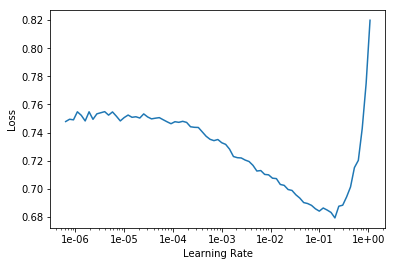

In [4]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.572725,0.533452,0.716783,00:11
1,0.560699,0.522981,0.718850,00:11
2,0.557650,0.518472,0.726555,00:11
3,0.560169,0.531973,0.727307,00:11
4,0.546773,0.518889,0.727683,00:11
5,0.554020,0.516650,0.734636,00:11
6,0.530944,0.505477,0.743845,00:11
7,0.532780,0.530711,0.704567,00:11
8,0.534404,0.497771,0.742718,00:11
9,0.533643,0.487446,0.747604,00:11


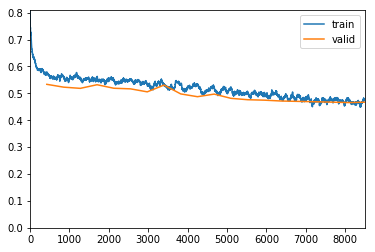

Better model found at epoch 0 with valid_loss value: 0.5334522724151611.
Better model found at epoch 1 with valid_loss value: 0.5229809880256653.
Better model found at epoch 2 with valid_loss value: 0.5184715390205383.
Better model found at epoch 5 with valid_loss value: 0.516649603843689.
Better model found at epoch 6 with valid_loss value: 0.5054768323898315.
Better model found at epoch 8 with valid_loss value: 0.49777108430862427.
Better model found at epoch 9 with valid_loss value: 0.48744645714759827.
Better model found at epoch 11 with valid_loss value: 0.48137980699539185.
Better model found at epoch 12 with valid_loss value: 0.47621971368789673.
Better model found at epoch 13 with valid_loss value: 0.47455376386642456.
Better model found at epoch 14 with valid_loss value: 0.4713968336582184.
Better model found at epoch 15 with valid_loss value: 0.4700685739517212.
Better model found at epoch 16 with valid_loss value: 0.46870604157447815.
Better model found at epoch 17 with vali

In [5]:
learn.fit_one_cycle(20, 1e-2, callbacks=[SaveModelCallback(learn, monitor="valid_loss", mode="min")])

In [6]:
learn.save("learn-clas-stage1")
learn.save_encoder("learn-clas-stage1-enc")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


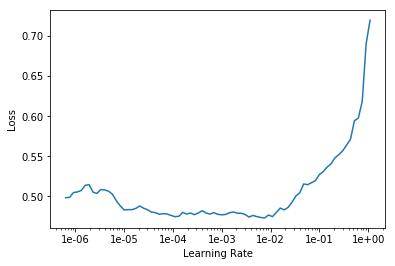

In [7]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.461540,0.465628,0.769216,00:33
1,0.468031,0.464192,0.766961,00:33
2,0.466055,0.462496,0.771284,00:33
3,0.466792,0.459722,0.770344,00:33
4,0.459887,0.457414,0.771284,00:32
5,0.456249,0.454628,0.773539,00:32
6,0.442274,0.452167,0.775230,00:33
7,0.437723,0.446689,0.777485,00:33
8,0.434418,0.443631,0.781432,00:34
9,0.438195,0.437791,0.782184,00:34


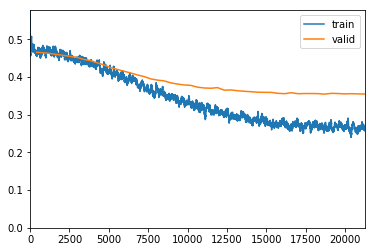

Better model found at epoch 0 with valid_loss value: 0.4656277894973755.
Better model found at epoch 1 with valid_loss value: 0.4641922116279602.
Better model found at epoch 2 with valid_loss value: 0.4624956548213959.
Better model found at epoch 3 with valid_loss value: 0.45972198247909546.
Better model found at epoch 4 with valid_loss value: 0.45741376280784607.
Better model found at epoch 5 with valid_loss value: 0.4546283781528473.
Better model found at epoch 6 with valid_loss value: 0.45216652750968933.
Better model found at epoch 7 with valid_loss value: 0.44668900966644287.
Better model found at epoch 8 with valid_loss value: 0.44363081455230713.
Better model found at epoch 9 with valid_loss value: 0.4377909302711487.
Better model found at epoch 10 with valid_loss value: 0.4323529005050659.
Better model found at epoch 11 with valid_loss value: 0.4251008629798889.
Better model found at epoch 12 with valid_loss value: 0.4203711152076721.
Better model found at epoch 13 with valid_l

In [8]:
learn.fit_one_cycle(50, 2e-5, callbacks=[SaveModelCallback(learn, monitor="valid_loss", mode="min")])

In [9]:
learn.predict("Man Annoyed At Being Mistaken For Employee Just Because He Driving Forklift Through Store")

(Category 1, tensor(1), tensor([0.0143, 0.9857]))